In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('monthly.csv')

In [28]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


## EDA Exploratory Data Analysis

In [29]:
print(df)

        Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]


In [30]:
df.shape

(847, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [32]:
print(f"Date range of gold prices availabke from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices availabke from - 1950-01 to 2020-07


In [33]:
date = pd.date_range(start ='1/1/1950', end ='8/1/2020', freq ='M')

In [34]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [36]:
df['month']= date
df.drop('Date', axis=1, inplace=True)
df=df.set_index('month')

In [37]:
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


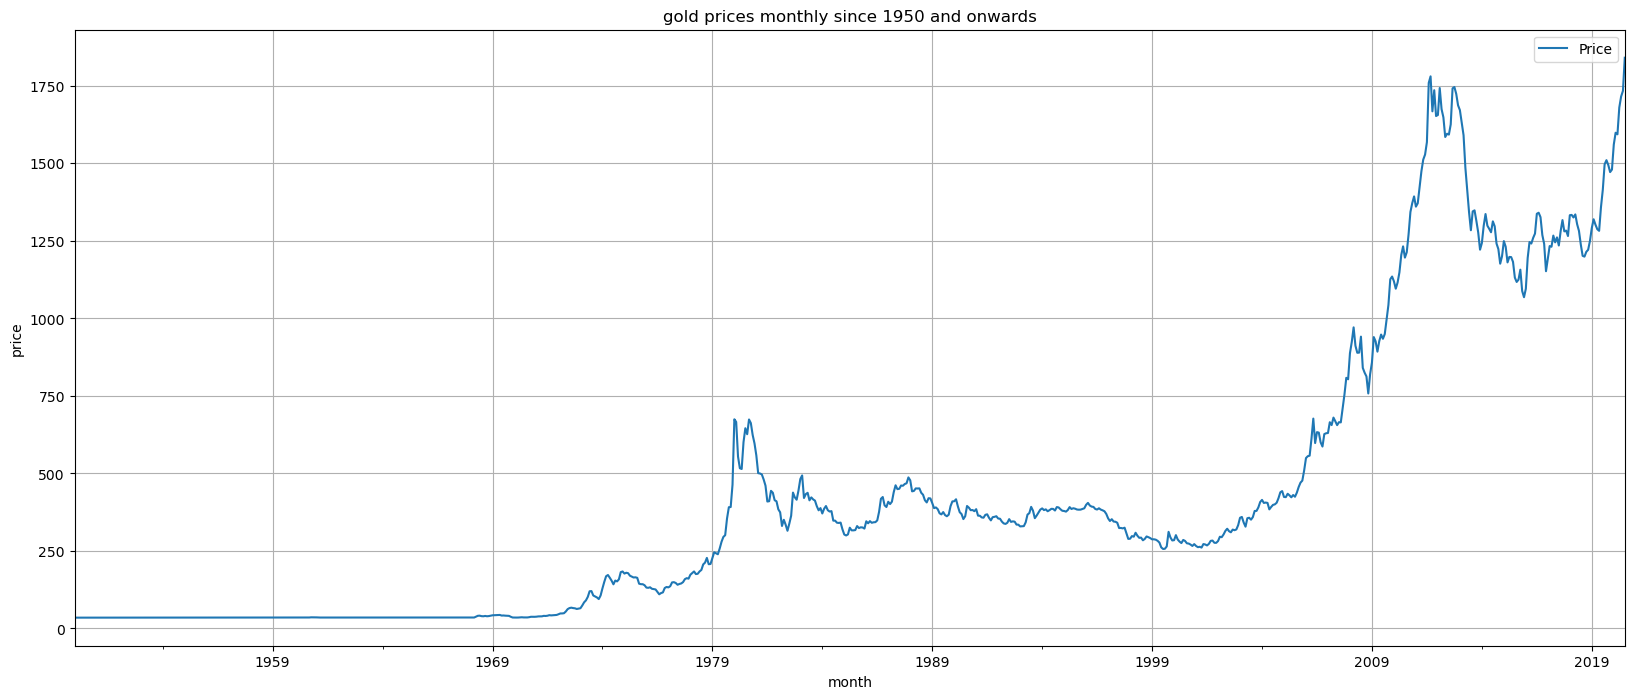

In [39]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [40]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


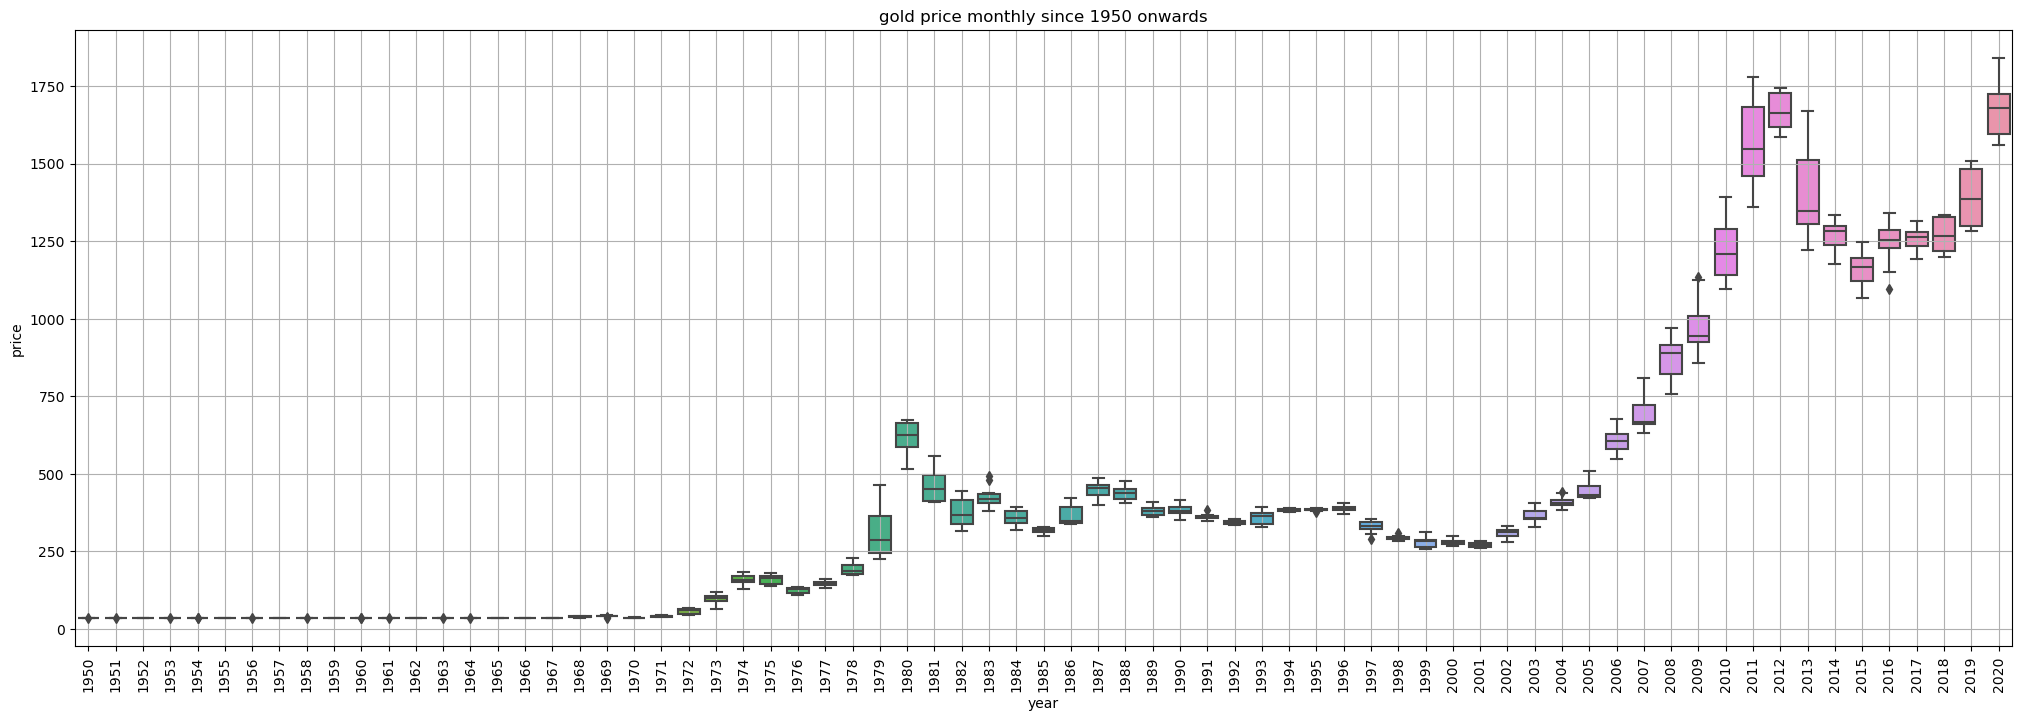

In [44]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y= df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

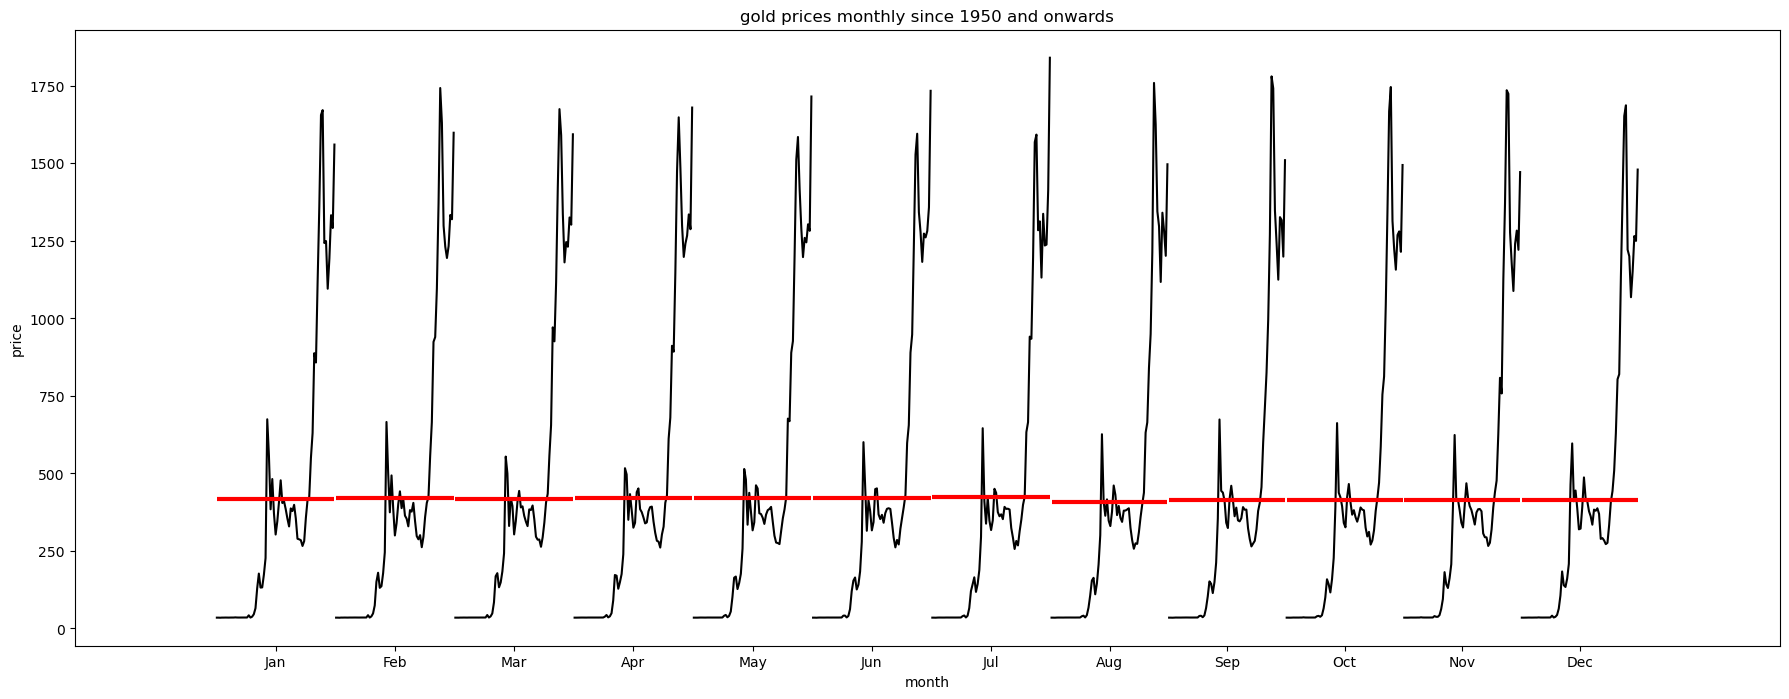

In [45]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax =plt.subplots(figsize=(22,8))
month_plot(df, ylabel='gold price', ax=ax)
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid

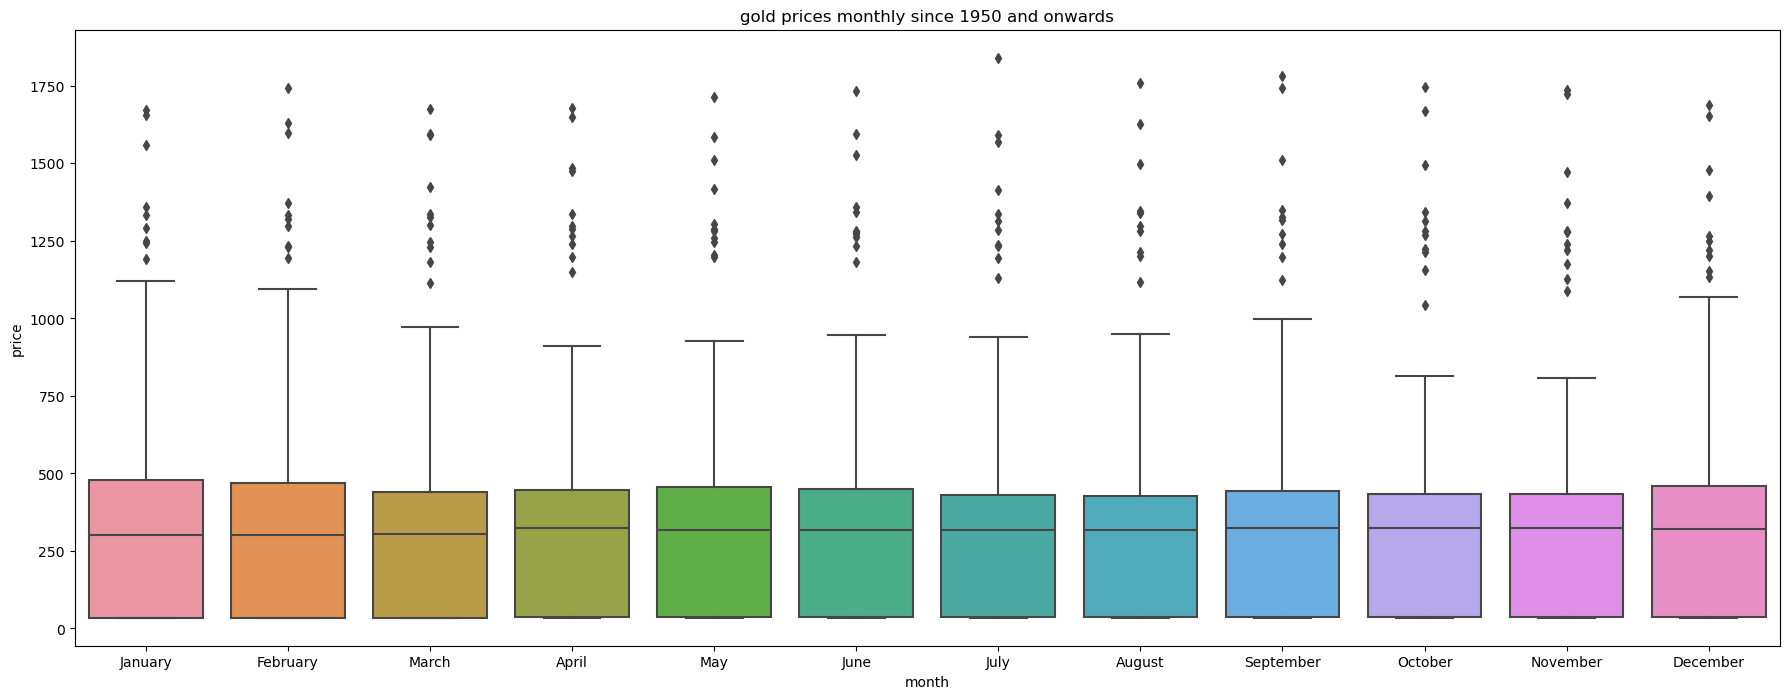

In [54]:
_, ax= plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:,0],ax=ax)
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

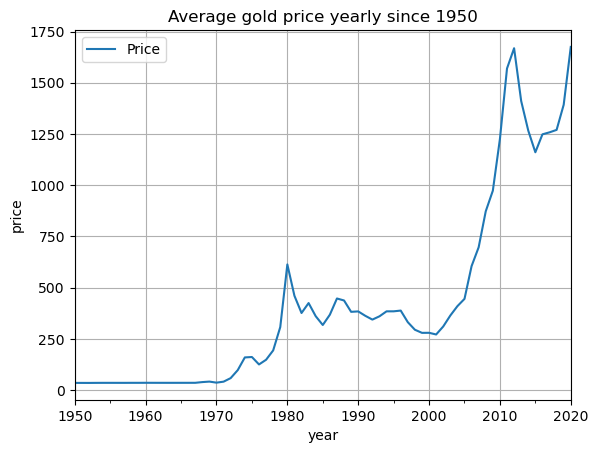

In [56]:
# Average gold price per year trend since 1950

df_yearly_sum =df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Average gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

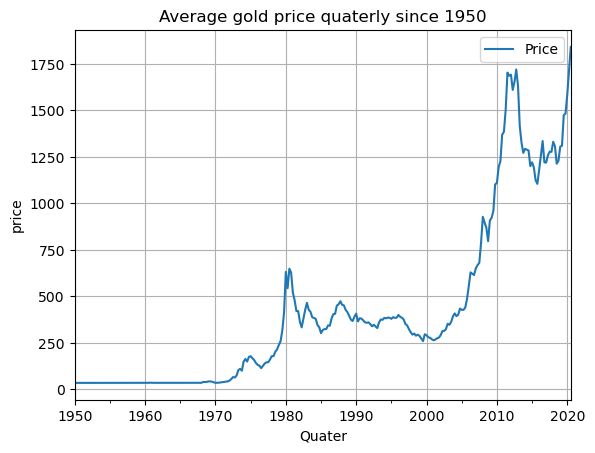

In [60]:
# Average gold price per quarter trend since 1950

df_quaterly_sum= df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title('Average gold price quaterly since 1950')
plt.xlabel('Quater')
plt.ylabel('price')
plt.grid();

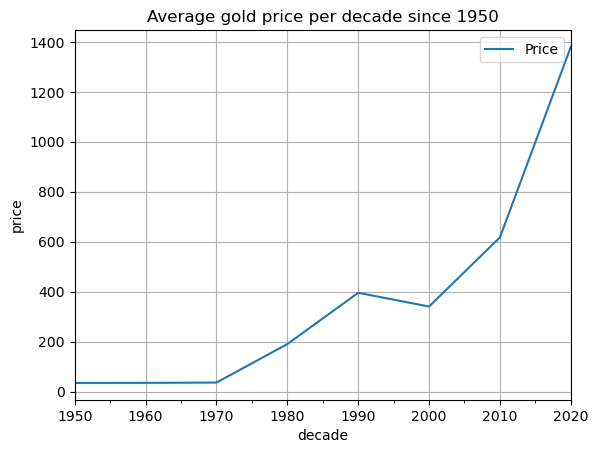

In [61]:
# Average gold price per decade trend since 1950

df_decade_sum= df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Average gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

## Analysis in Coefficient of variationf.

#### 1) The coefficient of variation (CV) is a statistical measure of the relative dispersion of data points in a data series around the mean.
#### 2) In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.
#### 3) The lower the ratio of the standard deviation to mean return, the better risk-return trade-off.

In [63]:
# Coefficient of variation in price

df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Coffv_pct']= ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Coffv_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


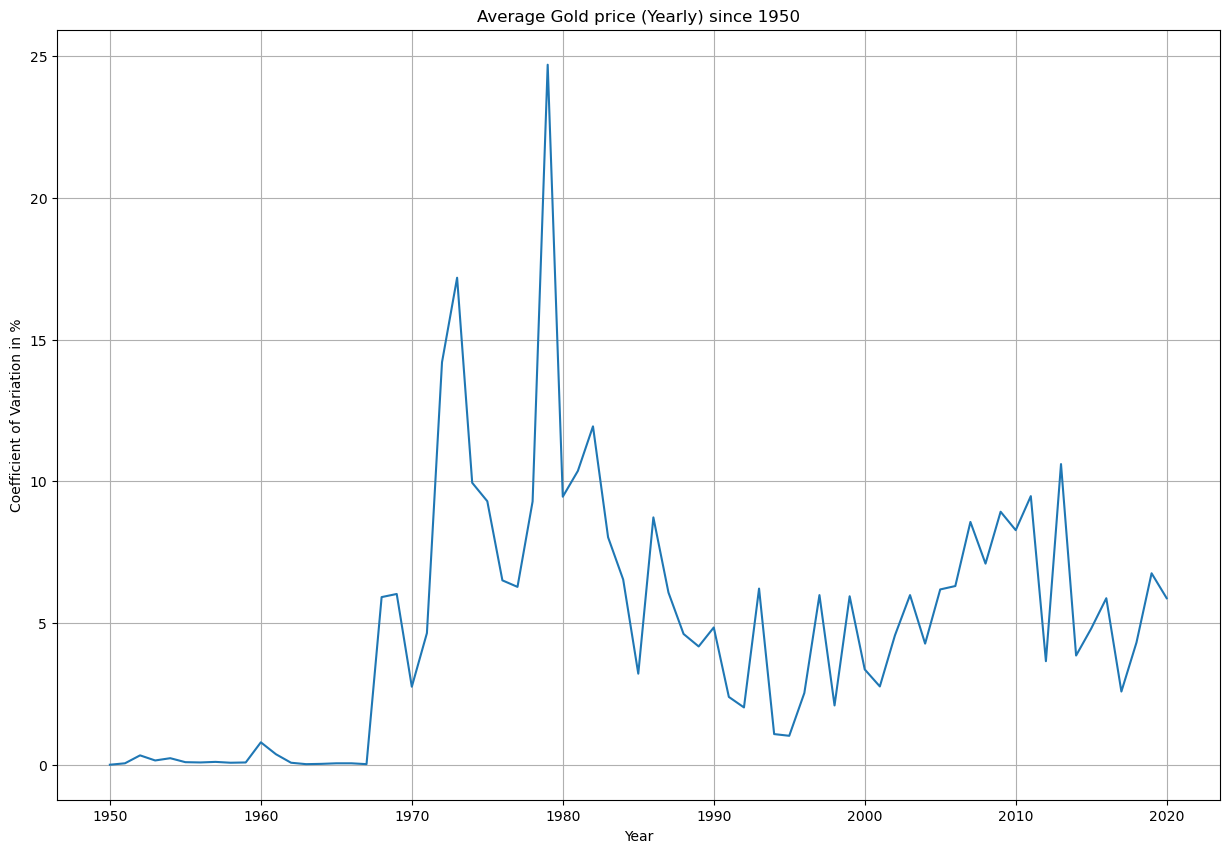

In [65]:
# Average gold price per year trend since 1950

fig, ax = plt.subplots(figsize=(15,10))
df_1['Coffv_pct'].plot();
plt.title("Average Gold price (Yearly) since 1950")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation in %")
plt.grid()

##### The CV value reached its highest in year 1978near to 25% which could have made the assets highly risky. And in 2020 the Cv value is closer to 5% which makes the assets variable for good investment.

## Time Series - Forecasting models

In [67]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [68]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


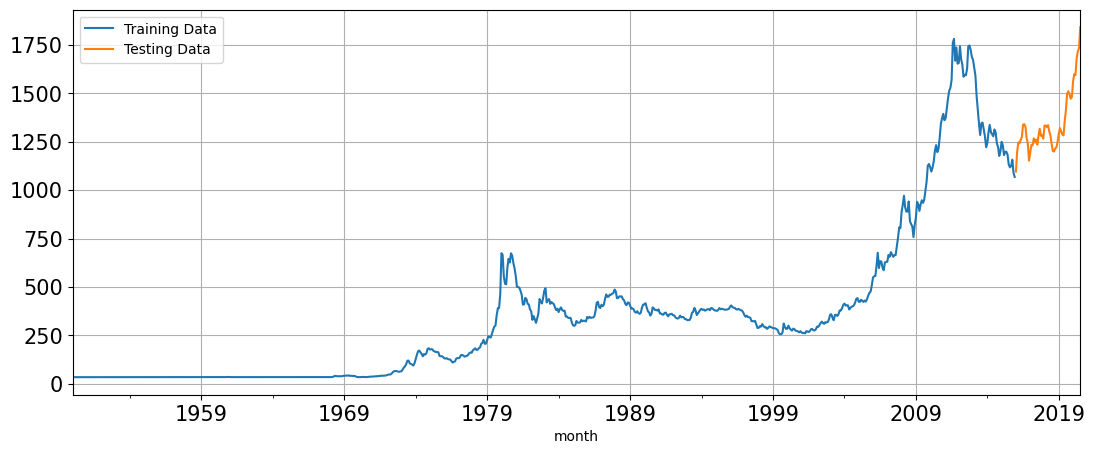

In [69]:
train['Price'].plot(figsize=(13,5),fontsize = 15)
test['Price'].plot(figsize=(13,5), fontsize = 15)
plt.grid();
plt.legend(['Training Data', 'Testing Data'])
plt.show()

### Linear Regression model

In [70]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [71]:
LR_train = train.copy()
LR_test = test.copy()

In [72]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [73]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

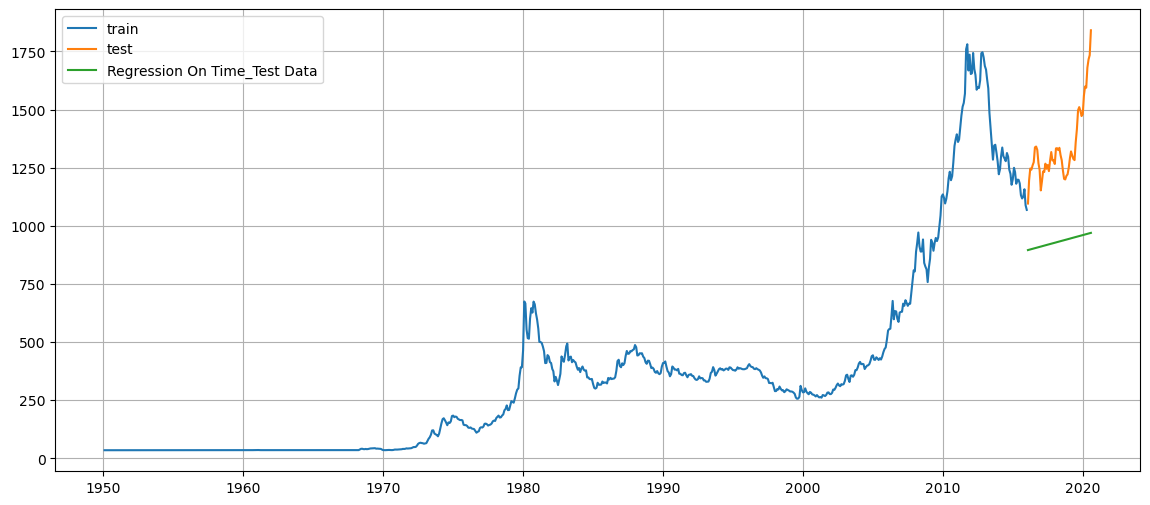

In [78]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'Regression On Time_Test Data')
plt.legend(loc = 'best')
plt.grid();

In [79]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/ actual))*100, 2)

In [88]:
# Get MAPE of the model

mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.3f" %(mape_model1_test),"%")

For RegressionOnTime forecast on the Test Data,  MAPE is 29.760 %


In [89]:
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]},index=['RegressionOnTime'])
results

,Test MAPE (%)
RegressionOnTime,29.76


### Naive prediction

In [90]:
Naive_train = train.copy()
Naive_test = test.copy()

In [91]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

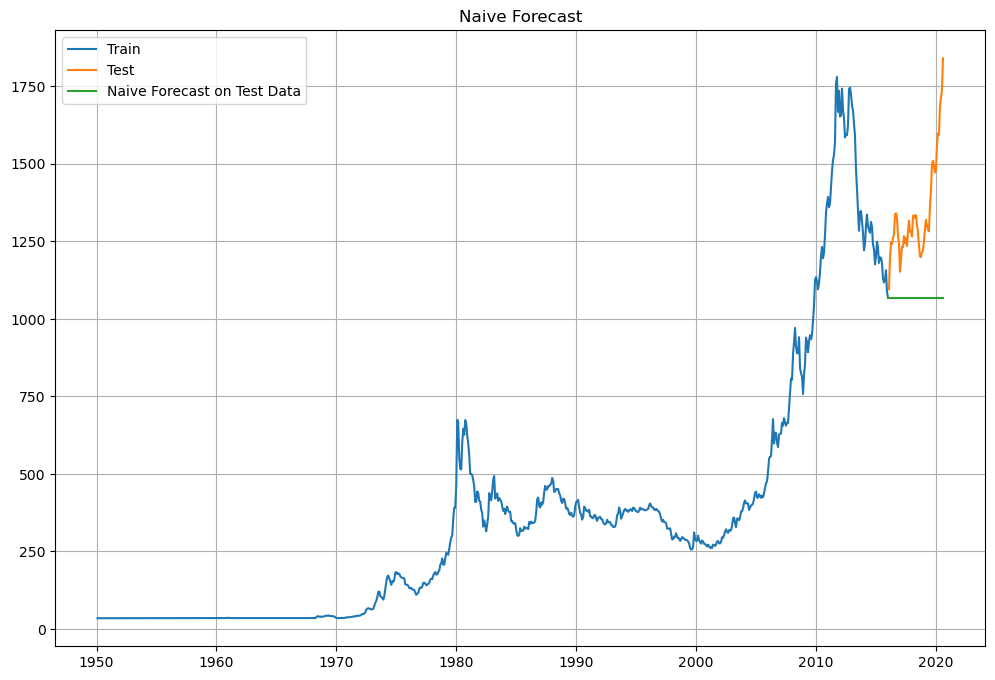

In [92]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [93]:
# Get MAPE of the model

mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the Test Data,  MAPE is %3.3f" %(mape_model2_test),"%")

For Naive forecast on the Test Data,  MAPE is 19.380 %


In [94]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])

results = pd.concat([results, resultsDf_2])
results

,Test MAPE (%)
RegressionOnTime,29.76
NaiveModel,19.38


### Final Model

In [95]:
final_model =  ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

In [96]:
MAPE_final_model = mape(df['Price'].values,final_model.fittedvalues)

print('MAPE:',MAPE_final_model)

MAPE: 17.24


In [99]:
# Getting the predictions for the same number of times stamps that are present in the test data

prediction = final_model.forecast(steps=len(test))

In [100]:
# Compute 95% confidence interval for predicted values

pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.716748,1792.867721,1901.018694
2020-09-30,1615.298179,1723.449152,1831.600125
2020-10-31,1538.554867,1646.705839,1754.856812
2020-11-30,1476.740491,1584.891463,1693.042436
2020-12-31,1459.304892,1567.455865,1675.606837


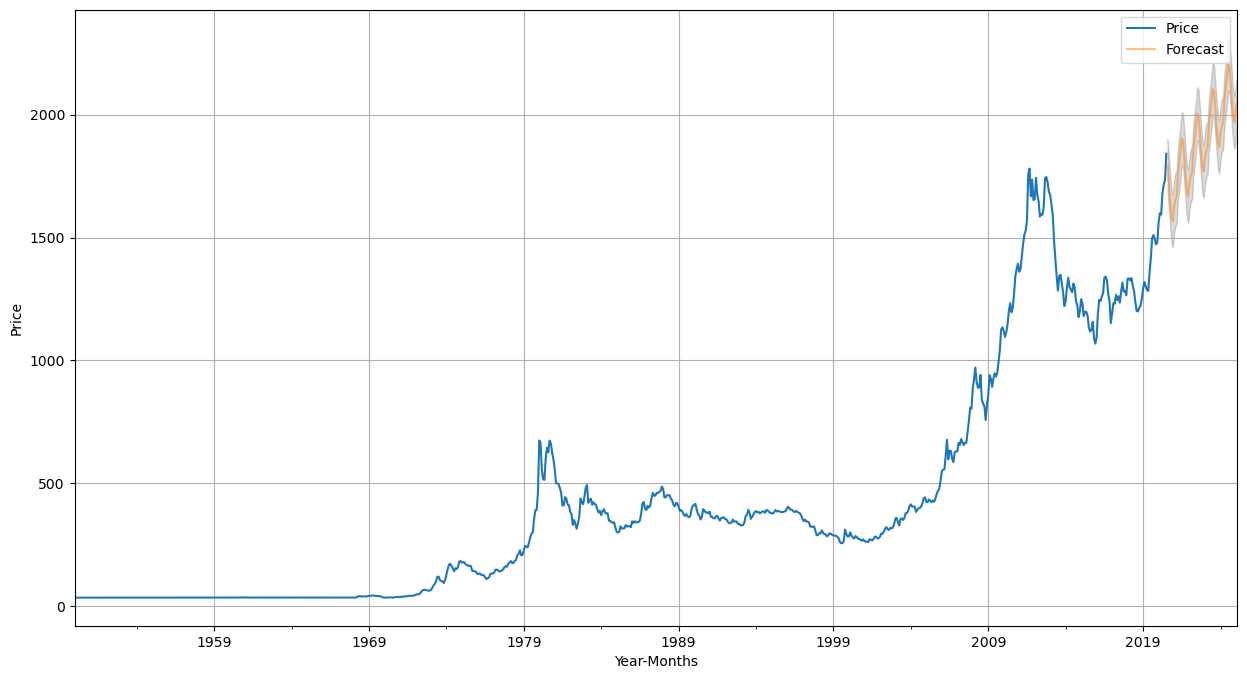

In [101]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()